# Zillow Regression Project: Estimating Home Value

In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

# set seaborn color palette
sns.color_palette("crest")
pal = sns.set_palette('crest')

# import models
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn.feature_selection as feat_select
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, normalize

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import custom functions
import acquire
#import prepare
#import explore
import wrangle

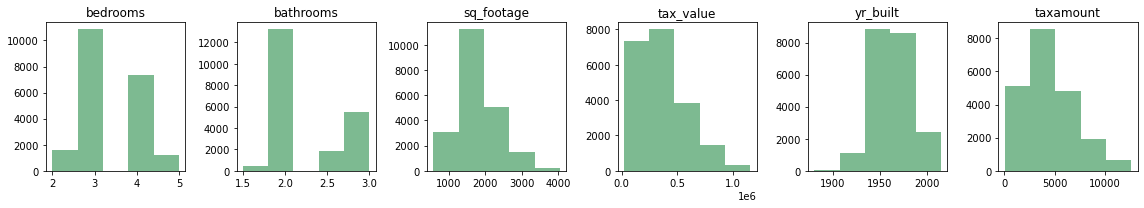

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,sq_footage,tax_value,yr_built,taxamount,fips
0,3.0,2.0,1772.0,418763.0,1978.0,4464.42,6111.0
1,3.0,2.0,1819.0,478430.0,1981.0,5515.94,6111.0
2,2.0,2.0,1503.0,171687.0,1933.0,2287.55,6037.0
3,4.0,2.0,1604.0,498347.0,1950.0,6089.82,6037.0
4,3.0,3.0,2384.0,549917.0,1937.0,6679.55,6037.0


In [4]:
df.shape

(21038, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21038 entries, 0 to 30604
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    21038 non-null  float64
 1   bathrooms   21038 non-null  float64
 2   sq_footage  21038 non-null  float64
 3   tax_value   21038 non-null  float64
 4   yr_built    21038 non-null  float64
 5   taxamount   21038 non-null  float64
 6   fips        21038 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [6]:
df.isna().sum()

bedrooms      0
bathrooms     0
sq_footage    0
tax_value     0
yr_built      0
taxamount     0
fips          0
dtype: int64

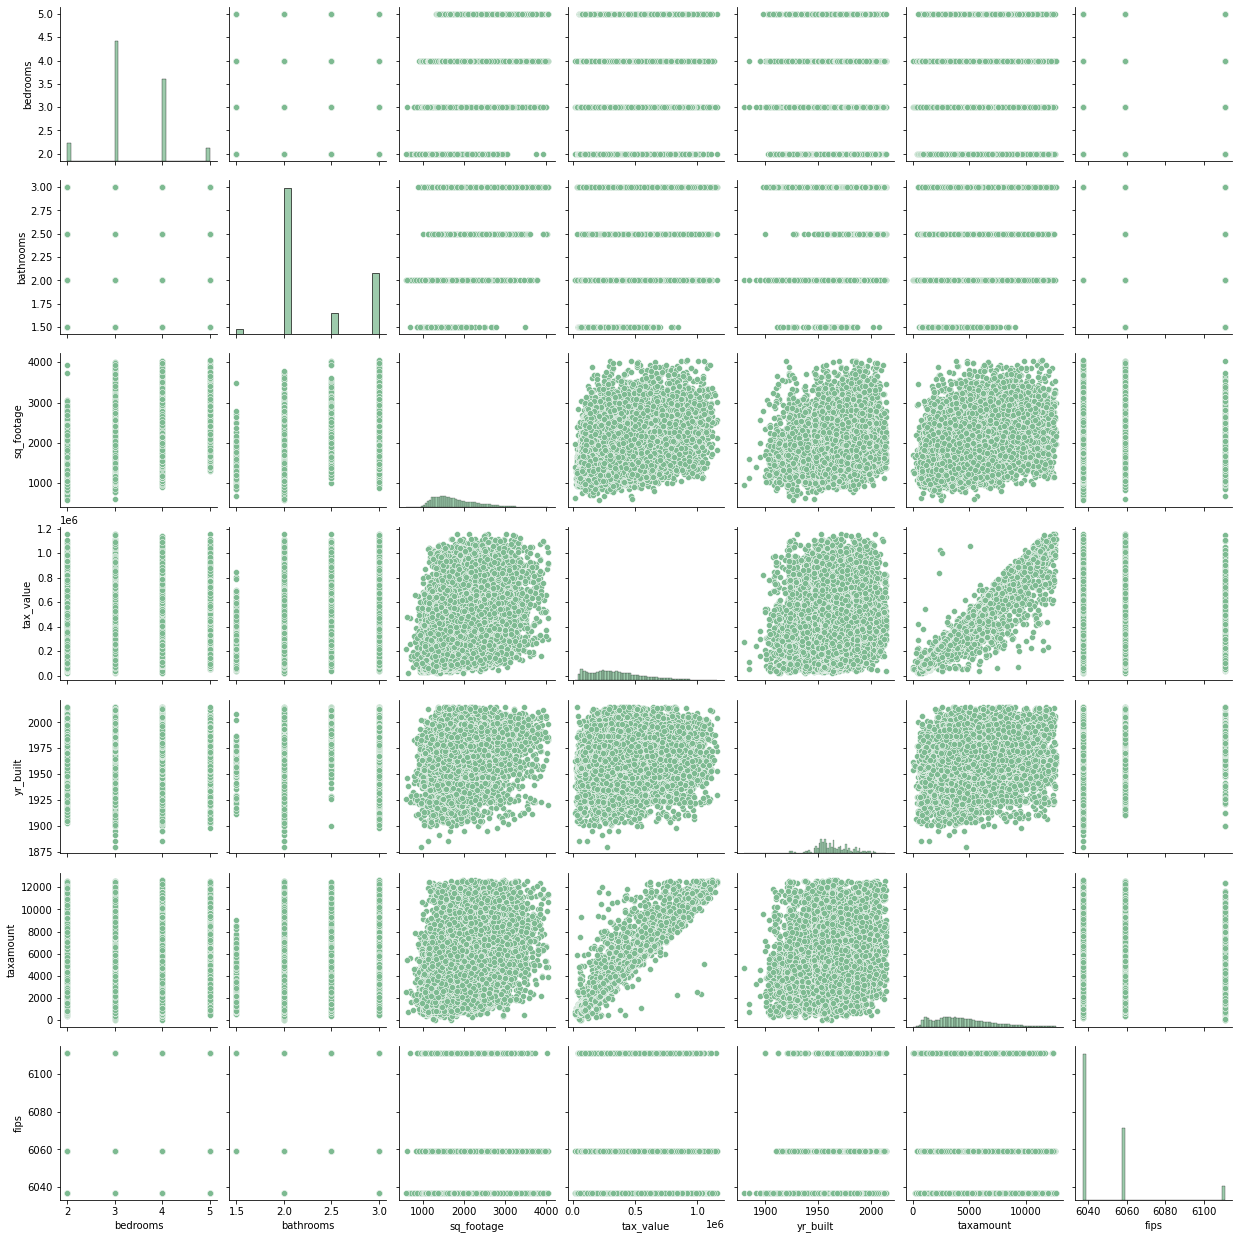

In [7]:
sns.pairplot(df)

In [13]:
print("Mean of bedrooms:",df.bedrooms.mean())
print("Mean of bathrooms:", df.bathrooms.mean())
print("Mean of square footage:",df.sq_footage.mean())
print("Mean of tax value : ", df.tax_value.mean())
print("Mean of yr built:", df.yr_built.mean())
print("Mean of tax amount:", df.taxamount.mean())

Mean of bedrooms: 3.3857781157904743
Mean of bathrooms: 2.294776119402985
Mean of square footage: 1797.46482555376
Mean of tax value :  362750.42632379505
Mean of yr built: 1963.5322749310772
Mean of tax amount: 4462.9672031561895


In [20]:
df.groupby('bedrooms').bathrooms.mean()

bedrooms
2.0    2.056373
3.0    2.175841
4.0    2.450637
5.0    2.740944
Name: bathrooms, dtype: float64

In [21]:
def plot_categorical_and_continuous_vars(categorical_vars, continuous_vars, df, descriptive=None):
    """
    This function that takes in a string name of a categorical variable, 
    a string name from a continuous variable and the df they live in and
    displays 4 different plots.
    """
    for categorical_var in categorical_vars:
        for continuous_var in continuous_vars:
            categorical_label = categorical_var
            continuous_label = continuous_var

            if descriptive:
                categorical_label = descriptive[categorical_var]
                continuous_label = descriptive[continuous_var]
                
            fig, axes = plt.subplots(figsize=(12,36), nrows=4,ncols=1)
            fig.suptitle(f'{continuous_label} by {categorical_label}', fontsize=18, y=1.02)

            sns.lineplot(ax=axes[0], x=categorical_var, y=continuous_var, data=df)
            axes[0].set_title('Line Plot', fontsize=14)
            axes[0].set_xlabel(categorical_label, fontsize=12)
            axes[0].set_ylabel(continuous_label, fontsize=12)
            
            sns.boxplot(ax=axes[1], x=categorical_var, y=continuous_var, data=df,\
                        color='blue')
            axes[1].set_title('Box-and-Whiskers Plot', fontsize=14)
            axes[1].set_xlabel(categorical_label, fontsize=12)
            axes[1].set_ylabel(continuous_label, fontsize=12)
            
            sns.swarmplot(ax=axes[2], x=categorical_var, y=continuous_var, data=df,\
                        palette='Blues')
            axes[2].set_title('Swarm Plot', fontsize=14)
            axes[2].set_xlabel(categorical_label, fontsize=12)
            axes[2].set_ylabel(continuous_label, fontsize=12)
            
            sns.barplot(ax=axes[3], x=categorical_var, y=continuous_var, data=df,\
                        palette='Purples')
            axes[3].set_title('Bar Plot', fontsize=14)
            axes[3].set_xlabel(categorical_label, fontsize=12)
            axes[3].set_ylabel(continuous_label, fontsize=12)
            
            plt.tight_layout()

            plt.show()

In [22]:
categorical_vars = ['bedrooms', 'bathrooms']
continuous_vars = ['sq_footage', 'tax_value']